<a href="https://colab.research.google.com/github/seongwoojang1123/Systemic-Review/blob/main/1_Figure_for_Systemic_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

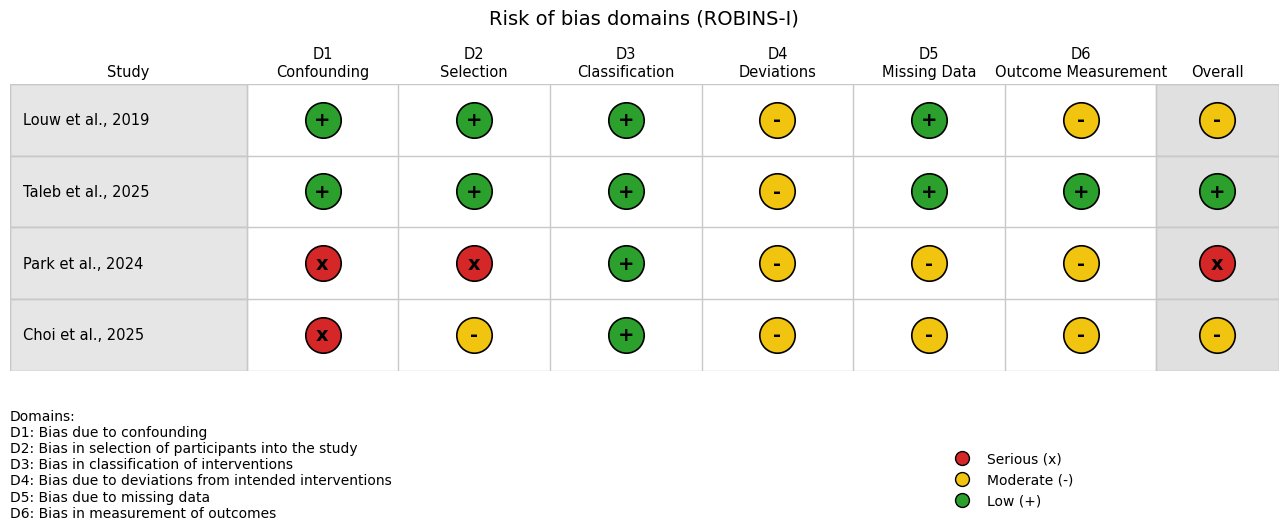

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches

# ----------------------------
# 1) 입력 데이터
# ----------------------------
data = [
    ["Louw et al., 2019",  "Low",     "Low",     "Low",     "Some",    "Low",     "Some",    "Some"],
    ["Taleb et al., 2025", "Low",     "Low",     "Low",     "Some",    "Low",     "Low",     "Low"],
    ["Park et al., 2024",  "Serious", "Serious", "Low",     "Some",    "Some",    "Some",    "Serious"],
    ["Choi et al., 2025",  "Serious", "Some",    "Low",     "Some",    "Some",    "Some",    "Some"],
]
cols = ["Study", "D1", "D2", "D3", "D4", "D5", "D6", "Overall"]
df = pd.DataFrame(data, columns=cols)

domains = ["D1","D2","D3","D4","D5","D6","Overall"]

short_header = {
    "D1": "Confounding",
    "D2": "Selection",
    "D3": "Classification",
    "D4": "Deviations",
    "D5": "Missing Data",
    "D6": "Outcome Measurement",
    "Overall": "Overall",
}

domain_desc = {
    "D1": "Bias due to confounding",
    "D2": "Bias in selection of participants into the study",
    "D3": "Bias in classification of interventions",
    "D4": "Bias due to deviations from intended interventions",
    "D5": "Bias due to missing data",
    "D6": "Bias in measurement of outcomes",
}

# ----------------------------
# 2) 등급 -> (기호, 색) 매핑
# ----------------------------
MAP = {
    "Low":      {"symbol": "+", "color": "#2ca02c", "label": "Low"},
    "Some":     {"symbol": "-", "color": "#f1c40f", "label": "Moderate"},
    "Moderate": {"symbol": "-", "color": "#f1c40f", "label": "Moderate"},
    "Serious":  {"symbol": "x", "color": "#d62728", "label": "Serious"},
    "Critical": {"symbol": "!", "color": "#8B0000", "label": "Critical"},
    "NI":       {"symbol": "?", "color": "#7f7f7f", "label": "No information"},
}

# ==========================================================
# A) 표 레이아웃
# ==========================================================
STUDY_COL_W   = 3.2
DOMAIN_COL_W  = 2.05
OVERALL_COL_W = 1.65
CELL_H        = 1.00

STUDY_FONT_SIZE  = 10.5
HEADER_FONT_SIZE = 10.5
TITLE_FONT_SIZE  = 14

STUDY_PAD_X   = 0.18
GRID_COLOR    = "#c8c8c8"
STUDY_BG      = "#e6e6e6"

# ✅ Overall "칸" 음영 회색 (셀 배경)
OVERALL_CELL_BG = "#e0e0e0"

CIRCLE_SIZE   = 650
SYMBOL_SIZE   = 14

# ==========================================================
# B) 하단 Domains + 범례 위치
# ==========================================================
BOTTOM_MARGIN = 0.30   # 하단 여백
RIGHT_MARGIN  = 0.82

SUBPLOT_LEFT  = 0.04
SUBPLOT_RIGHT = RIGHT_MARGIN

FOOT_FONT_SIZE = 10
FOOT_Y = 0.02

# 하단 2컬럼 배치(이미지처럼: Domains 왼쪽 넓게, 범례 오른쪽)
FOOT_COLS_LEFT_RATIO = 0.73

# ----------------------------
# 3) 가변 폭 격자 좌표 계산
# ----------------------------
studies = df["Study"].tolist()
n_rows = len(studies)

col_widths = [STUDY_COL_W] + [DOMAIN_COL_W]*6 + [OVERALL_COL_W]
x_edges = [0.0]
for w in col_widths:
    x_edges.append(x_edges[-1] + w)
x_centers = [(x_edges[i] + x_edges[i+1]) / 2 for i in range(len(col_widths))]

y_edges = [i * CELL_H for i in range(n_rows + 1)]
y_centers = [i * CELL_H + CELL_H/2 for i in range(n_rows)]

# ----------------------------
# 4) Figure + Axes
# ----------------------------
fig_w = 0.82 * sum(col_widths) + 2.2
fig_h = 0.78 * n_rows + 2.2
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

ax.set_xlim(x_edges[0], x_edges[-1])
ax.set_ylim(y_edges[0], y_edges[-1])
ax.invert_yaxis()

# 격자선
for xe in x_edges:
    ax.axvline(xe, color=GRID_COLOR, linewidth=1)
for ye in y_edges:
    ax.axhline(ye, color=GRID_COLOR, linewidth=1)

# ----------------------------
# 4-1) Study 컬럼 배경 + 텍스트
# ----------------------------
for i, s in enumerate(studies):
    rect = patches.Rectangle(
        (x_edges[0], y_edges[i]),
        width=STUDY_COL_W, height=CELL_H,
        facecolor=STUDY_BG, edgecolor=GRID_COLOR, linewidth=1, zorder=0
    )
    ax.add_patch(rect)

    ax.text(
        x_edges[0] + STUDY_PAD_X, y_centers[i],
        s, ha="left", va="center", fontsize=STUDY_FONT_SIZE, zorder=2
    )

# ----------------------------
# ✅ 4-2) Overall 열 "칸" 음영(배경 셀 회색) 추가
#     - 원/기호는 그대로 위에 그려짐
# ----------------------------
overall_col_index = 1 + domains.index("Overall")  # 0=Study, 1=D1 ...
overall_x0 = x_edges[overall_col_index]
overall_w  = x_edges[overall_col_index + 1] - x_edges[overall_col_index]

for i in range(n_rows):
    rect = patches.Rectangle(
        (overall_x0, y_edges[i]),
        width=overall_w, height=CELL_H,
        facecolor=OVERALL_CELL_BG, edgecolor=GRID_COLOR, linewidth=1, zorder=0.5
    )
    ax.add_patch(rect)

# ----------------------------
# 4-3) 도메인 원 + 기호 (Overall도 색 규칙은 동일)
# ----------------------------
for i in range(n_rows):
    for k, dom in enumerate(domains):
        x = x_centers[1 + k]
        y = y_centers[i]

        val = str(df.loc[i, dom]).strip()
        if val not in MAP:
            val = "NI"

        ax.scatter(
            x, y, s=CIRCLE_SIZE, c=MAP[val]["color"],
            edgecolors="black", linewidths=1.2, zorder=3
        )
        ax.text(
            x, y, MAP[val]["symbol"],
            ha="center", va="center",
            fontsize=SYMBOL_SIZE, fontweight="bold", zorder=4
        )

# ----------------------------
# 4-4) 헤더(위쪽)
# ----------------------------
headers = ["Study"] + [f"{d}\n{short_header[d]}" if d != "Overall" else "Overall" for d in domains]
ax.set_xticks(x_centers)
ax.set_xticklabels(headers, fontsize=HEADER_FONT_SIZE)
ax.xaxis.tick_top()
ax.tick_params(axis="x", length=0)

ax.set_yticks([])
ax.tick_params(axis="y", length=0)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Risk of bias domains (ROBINS-I)", fontsize=TITLE_FONT_SIZE, pad=16)

# ----------------------------
# 5) 하단: Domains(왼쪽) + 범례(오른쪽)
# ----------------------------
plt.subplots_adjust(bottom=BOTTOM_MARGIN, right=RIGHT_MARGIN, top=0.84, left=SUBPLOT_LEFT)

# Domains 텍스트(이미지 순서대로 한 줄씩)
foot_lines = ["Domains:"]
for d in ["D1","D2","D3","D4","D5","D6"]:
    foot_lines.append(f"{d}: {domain_desc[d]}")
foot_text = "\n".join(foot_lines)

usable_w = SUBPLOT_RIGHT - SUBPLOT_LEFT
foot_left_x  = SUBPLOT_LEFT
foot_right_x = SUBPLOT_LEFT + usable_w * FOOT_COLS_LEFT_RATIO

fig.text(
    foot_left_x, FOOT_Y, foot_text,
    ha="left", va="bottom",
    fontsize=FOOT_FONT_SIZE
)

# 범례: Domains 오른쪽에 (이미지처럼)
legend_handles = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=MAP["Serious"]["color"], markeredgecolor='black',
           markersize=10, label="Serious (x)"),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=MAP["Moderate"]["color"], markeredgecolor='black',
           markersize=10, label="Moderate (-)"),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=MAP["Low"]["color"], markeredgecolor='black',
           markersize=10, label="Low (+)"),
]

fig.legend(
    handles=legend_handles,
    loc="lower left",
    bbox_to_anchor=(foot_right_x, FOOT_Y),
    frameon=False,
    fontsize=FOOT_FONT_SIZE
)

plt.savefig("robins_i_symbols_final.png", dpi=300, bbox_inches="tight")
plt.show()
